In [1]:
from src.pipeline.machine_learning import get_ml_model_results
from src.feature.feature_importance import model_feature_selection, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTEN
from src.utils.rw_utils import read_from_csv, save_model
from src.utils.plot import plot_pie_chart

from imblearn.pipeline import Pipeline

In [2]:
# resource: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

In [2]:
data = read_from_csv("preprocessed.csv")
data.head()

Data is read. Len of the data 283726 and columns Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
label_column_name = "Class"
x, y = data.drop([label_column_name], axis=1), data[[label_column_name]]

In [5]:
# combine over-under sampler
# over sampling ile az olan örneklerin sayısını fazla olan örneklerin sayısının % 20 si kadar artırdık
# sonrasında iki sınıfın sayısını eşitledik

over = SMOTEN(sampling_strategy=.2)
under = NearMiss(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [6]:
x, y = pipeline.fit_resample(x, y)

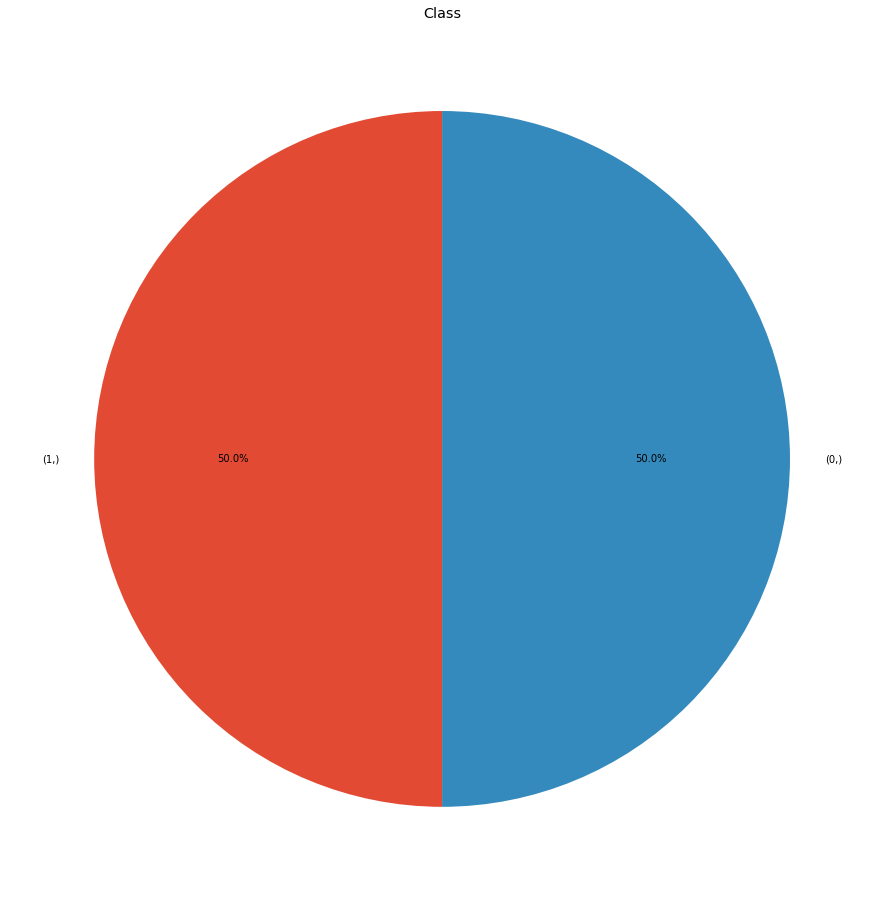

In [33]:
# plot after sampling
df_label_counts = y.value_counts()
labels = list(df_label_counts.to_frame().index)
counts = df_label_counts.values
plot_pie_chart(labels, counts, "Class").show()

In [7]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
# scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
model_res = get_ml_model_results(x_train_scaled, y_train, x_test_scaled, y_test)
model_res

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,1.00,1.00,1.00,1.0,1.00
1,KNeighborsClassifier,1.00,1.00,1.00,1.0,1.00
2,DecisionTreeClassifier,1.00,1.00,1.00,1.0,1.00
4,RandomForestClassifier,1.00,1.00,1.00,1.0,1.00
5,AdaBoostClassifier,1.00,1.00,1.00,1.0,1.00
6,GradientBoostingClassifier,1.00,1.00,1.00,1.0,1.00
7,XGBClassifier,1.00,1.00,1.00,1.0,1.00
3,GaussianNB,0.99,0.99,0.99,1.0,0.99


# Use feature selection

In [4]:
x, y = data.drop([label_column_name], axis=1), data[[label_column_name]]
x_selected = x[["V14", "V10", "Amount", "V17", "V12", "V11"]]

In [5]:
over = SMOTEN(sampling_strategy=.2)
under = NearMiss(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [6]:
x, y = pipeline.fit_resample(x_selected, y)

In [7]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
# scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
model_res_selected = get_ml_model_results(x_train_scaled, y_train, x_test_scaled, y_test)
model_res_selected

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,1.0,1.0,1.0,1.0,1.0
1,KNeighborsClassifier,1.0,1.0,1.0,1.0,1.0
2,DecisionTreeClassifier,1.0,1.0,1.0,1.0,1.0
3,GaussianNB,1.0,1.0,1.0,1.0,1.0
4,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0
5,AdaBoostClassifier,1.0,1.0,1.0,1.0,1.0
6,GradientBoostingClassifier,1.0,1.0,1.0,1.0,1.0
7,XGBClassifier,1.0,1.0,1.0,1.0,1.0


In [30]:
x.shape

(113300, 6)

# XGBoost Confusion Matrix with Feature Selection


In [9]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from xgboost import XGBClassifier

In [10]:
model = XGBClassifier()
predicted = model.fit(x_train_scaled, y_train).predict(x_test_scaled)

In [11]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17119
           1       1.00      1.00      1.00     16871

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990



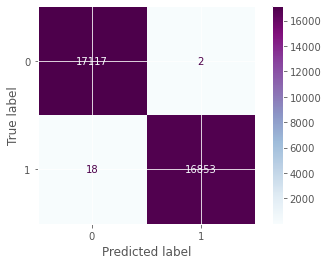

In [12]:
plot_confusion_matrix(model, x_test_scaled, y_test,cmap="BuPu");

# Save model

In [17]:
save_model(steps=[('StandardScaler', scaler), ('XGBClassifier', model)], name="xgboost")

Model saved to path: /home/havvanur/PycharmProjects/web_minig_project/results/ with name xgboost
